In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
wolt_clean = pd.read_csv("../geotracker/data/wolt_clean_data.csv")

In [106]:
data = pd.read_csv("../geotracker/data/lieferando_restaurants_from_api.csv")
# Drop duplicates
data.drop_duplicates(subset=["restaurant_name", "street", "latitude", "longitude"] , inplace=True)
# rename platform variable to database
data.rename(columns={"platform": "database", "city": "city_name"}, inplace=True)
# multiply review score by 2 
data.avg_review_score = data.avg_review_score * 2
# convert minimum order value into euros (from cents)
data.minimum_order_value = data.minimum_order_value / 100
# convert delivery fee into euros
data.delivery_fee = data.delivery_fee / 100

In [107]:
len(data)

3330

In [108]:
data.head()

,restaurant_name,database,reviews,avg_review_score,street,zip_code,city_name,latitude,longitude,type_of_cuisine,avg_delivery_time,pricyness,delivery_fee,minimum_order_value
0,Bring Bakery,lieferando,18,8.0,Beusselstraße 31,10115,Berlin,52.530300,13.328854,"['desserts_954', 'breakfast_361']",30,0,0.0,10.0
1,Sushi Yana,lieferando,3727,7.4,Waldstraße 1,10115,Berlin,52.527432,13.330914,"['sushi_51', 'asian_1864', 'poke-bowl_2318']",40,971,0.0,20.0
2,Funa Sushi,lieferando,8288,9.2,Alt-Moabit 73a,10115,Berlin,52.524140,13.332850,"['sushi_51', 'salads_1456']",50,1188,0.0,12.9
3,Ossaka Sushi,lieferando,5713,8.8,Beusselstraße 72,10115,Berlin,52.528232,13.328375,"['sushi_51', 'asian_1864', 'thai_61']",30,1178,0.0,20.0
4,Chainone,lieferando,82,8.4,Gotzkowskystraße 24,10115,Berlin,52.524473,13.330153,"['italian-pizza_271', 'burgers_541', 'pasta_16...",30,0,2.0,20.0


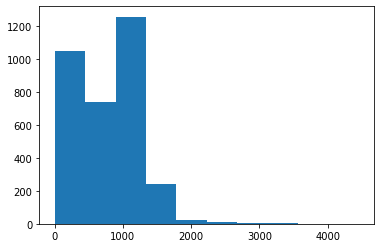

In [109]:
plt.hist(data.pricyness);

In [110]:
data.type_of_cuisine = data.type_of_cuisine.str.replace(r"[0-9]{1,4}", "", regex=True)
data.type_of_cuisine = data.type_of_cuisine.apply(lambda x: x.replace(
    "'", "").replace(" ", "").replace("[", "").replace("]", "").replace("_", "").replace("-", ""))

data

,restaurant_name,database,reviews,avg_review_score,street,zip_code,city_name,latitude,longitude,type_of_cuisine,avg_delivery_time,pricyness,delivery_fee,minimum_order_value
0,Bring Bakery,lieferando,18,8.0,Beusselstraße 31,10115,Berlin,52.530300,13.328854,"desserts,breakfast",30,0,0.00,10.00
1,Sushi Yana,lieferando,3727,7.4,Waldstraße 1,10115,Berlin,52.527432,13.330914,"sushi,asian,pokebowl",40,971,0.00,20.00
2,Funa Sushi,lieferando,8288,9.2,Alt-Moabit 73a,10115,Berlin,52.524140,13.332850,"sushi,salads",50,1188,0.00,12.90
3,Ossaka Sushi,lieferando,5713,8.8,Beusselstraße 72,10115,Berlin,52.528232,13.328375,"sushi,asian,thai",30,1178,0.00,20.00
4,Chainone,lieferando,82,8.4,Gotzkowskystraße 24,10115,Berlin,52.524473,13.330153,"italianpizza,burgers,pasta",30,0,2.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87351,McDonald's®,lieferando,506,9.2,Potsdamer Straße 2,14165,Teltow,52.394903,13.237983,"burgers,american,icecream",20,0,0.00,15.00
87375,Domino's Pizza,lieferando,524,9.2,Potsdamer Straße 53,14165,Teltow,52.401662,13.259465,"italianpizza,salads,snacks",25,1002,0.00,7.90
87389,Le Asia,lieferando,951,8.6,Potsdamer Straße 61,14165,Teltow,52.401336,13.260552,"sushi,japanese,asian",30,819,0.00,15.00
87391,burgerme,lieferando,84,8.6,Bäckerstraße 4,14165,Teltow,52.401440,13.263313,"burgers,american,snacks",30,0,1.99,6.99


In [111]:
new =  data.type_of_cuisine.str.split(",", expand=True)
new.head()

,0,1,2,3,4
0,desserts,breakfast,None,None,None
1,sushi,asian,pokebowl,None,None
2,sushi,salads,None,None,None
3,sushi,asian,thai,None,None
4,italianpizza,burgers,pasta,None,None


In [112]:
data["primary_cuisine"] = new[0]
data.primary_cuisine.unique()

array(['desserts', 'sushi', 'italianpizza', 'indian', 'burgers',
       'italian', 'asian', 'vegetarian', 'salads', 'doener', 'greek',
       'halal', 'pasta', 'falafel', 'chinese', 'sandwiches', 'steak',
       'lunch', 'turkish', 'mexican', 'breakfast', 'german', 'cafe',
       'french', 'indonesian', 'curry', 'arab', 'drinks', 'pancakes',
       'american', 'austrian', 'icecream', 'bakedgoods', 'groceries',
       'african', 'japanese', 'schnitzel', 'fries', 'snacks',
       'argentinian', 'polish', 'glutenfree', 'drinksandsnacks',
       'chicken', 'soup', 'fish', 'bio', 'beef', 'russian', 'iranian',
       'pokebowl', 'spanishandtapas', 'vietnamese', 'dumplings', 'balkan',
       'pork', 'wrap', 'cake'], dtype=object)

In [113]:
unique_toc_dict_wolt = {
    'thai': 'asian',
    'fine-dining': np.nan,
    'cheese': np.nan,
    'fusion': np.nan,
    'butterchicken': 'indian',
    'chinese': 'asian',
    'traditional': np.nan,
    'café': 'cafes',
    'german': 'european',
    'cocktail': 'bars',
    'hamburger': 'fastfood',
    'baklava': 'middle eastern',
    'pokebowl': 'poke',
    'bagel': 'breakfast/dessert',
    'waffles': 'cafes',
    'worklunch': 'fastfood',
    'tapas': 'mediterranean',
    'mediterranean': 'mediterranean',
    'pastries': 'breakfast/dessert',
    'sliders': 'fastfood',
    'turkish': 'middle eastern',
    'steak': 'steak',
    'snacks': 'snacks',
    'Sashimi': 'asian',
    'pancakes': 'breakfast/dessert',
    'Georgian': 'european',
    'risotto': 'italian',
    'glutenfree': 'healthy',
    'bento': 'asian',
    'bistro': 'european',
    'shawarma': 'middle eastern',
    'meatballs': 'european',
    'sushi': 'asian',
    'fish': 'seafood',
    'Don': 'asian',
    'bakery': 'breakfast/dessert',
    'delicious': np.nan,
    'mexican': 'mexican',
    'summerrolls': 'asian',
    'chickennuggets': 'fastfood',
    'korean': 'asian',
    'vegan': 'vegetarian or vegan',
    'chocolate': 'breakfast/dessert',
    'porridge': 'breakfast/dessert',
    'Schnitzel': 'european',
    'Arabic': 'middle eastern',
    'moussaka': 'mediterranean',
    'Dessert': 'breakfast/dessert',
    'vegetarian': 'vegetarian or vegan',
    'donut': 'breakfast/dessert',
    'friedchicken': 'fastfood',
    'smoothie': 'breakfast/dessert',
    'beer': 'bars',
    'indian': 'indian',
    'rice': 'asian',
    'fruit': 'breakfast/dessert',
    'icecoffee': 'cafes',
    'Pastrami': "american",
    'dumplings': 'asian',
    'currywurst': 'fastfood',
    'asian': 'asian',
    'pizza': 'italian',
    'grill': 'steak',
    'seafood': 'seafood',
    'wine': 'bars',
    'schnitzel': 'european',
    'american': 'american',
    'healthy': 'healthy',
    'hummus': 'middle eastern',
    'russian': 'russian',
    'Donburi': "asian",
    'baguette': 'breakfast/dessert',
    'salad': 'healthy',
    'fries': 'fastfood',
    'Austrian': 'european',
    'gyoza': 'asian',
    'potato': np.nan,
    'naan': 'indian',
    'icecream': 'breakfast/dessert',
    'pita': 'mediterranean',
    'sausage': 'european',
    'neapolitanpizza': 'italian',
    'spaghetti': 'italian',
    'cake': 'breakfast/dessert',
    'ribs': 'american',
    'dessert': "breakfast/dessert",
    'Doughnut': 'breakfast/dessert',
    'matcha': 'breakfast/dessert',
    'focaccia': 'italian',
    'homemade': np.nan,
    'milkshake': 'american',
    'taco': 'mexican',
    'curry': 'fastfood',
    'israeli': 'middle eastern',
    'bapburgersandpastrami': "american",
    'sandwich': 'fastfood',
    'bowl': 'poke',
    'maki': 'asian',
    'roll': np.nan,
    'brunch': 'breakfast/dessert',
    'pho': 'asian',
    'vietnamese': 'asian',
    'burgers': 'fastfood',
    'muchapizza': 'italian',
    'masala': 'indian',
    'contemporary': np.nan,
    'falafel': 'middle eastern',
    'gyros': 'mediterranean',
    'friedrice': 'asian',
    'chicken': 'snacks',
    'italian': 'italian',
    'spaetzle': 'european',
    'streetfood': 'fastfood',
    'Mozzarella': 'italian',
    'ramen': 'asian',
    'antipasti': 'italian',
    'noodles': 'italian',
    'hotdog': 'snacks',
    'coffee': 'cafes',
    'oriental': 'middle eastern',
    'bubbletea': 'breakfast/dessert',
    'greek': 'mediterranean',
    'middleeastern': 'middle eastern',
    'pasta': 'italian',
    'fresh': 'healthy',
    'tandoori': 'indian',
    'wrap': 'healthy',
    'european': 'european',
    'tea': 'breakfast/dessert',
    'bao': 'asian',
    'beyondmeat': 'vegetarian or vegan',
    'duck': 'asian',
    'galette': 'european',
    'panini': 'italian',
    'soup': 'healthy',
    'fastfood': 'american',
    'LatinAmerican': 'south american',
    'juice': 'breakfast/dessert',
    'halal': 'middle eastern',
    'burger': 'fastfood',
    'vegetable': 'vegetarian or vegan',
    'Hawaii': 'american',
    'breakfast': 'breakfast/dessert',
    'poke': 'poke',
    'drinks': 'bars',
    'burrito': 'mexican',
    'salmon': 'seafood',
    'homecooking': np.nan,
    'spanish': 'mediterranean',
    'meat': 'steak',
    'french': 'european',
    'veggieburger': 'vegetarian or vegan',
    'lunch': 'steak',
    'meze': 'middle eastern',
    'homemademeals': np.nan,
    'kebab': 'middle eastern',
    'beef': 'steak',
    'tex-mex': 'mexican',
    'japanese': 'asian',
    '': np.nan
}

set(unique_toc_dict_wolt.values())

{'american',
 'asian',
 'bars',
 'breakfast/dessert',
 'cafes',
 'european',
 'fastfood',
 'healthy',
 'indian',
 'italian',
 'mediterranean',
 'mexican',
 'middle eastern',
 nan,
 'poke',
 'russian',
 'seafood',
 'snacks',
 'south american',
 'steak',
 'vegetarian or vegan'}

In [114]:
primary_toc_dict = {
    'desserts': 'breakfast/dessert',
    'sushi': "asian",
    'italianpizza': "italian", 
    'indian': "indian",
    'burgers': "american",
    'italian': "italian",
    'asian': "asian",
    'vegetarian': "vegetarian or vegan",
    'salads': "healthy",
    'doener': "middle eastern",
    'greek': "mediterranean",
    'halal': "middle eastern",
    'pasta': "italian",
    'falafel': "middle eastern",
    'chinese': "asian",
    'sandwiches': "cafes",
    'steak': "steak",
    'lunch': np.nan,
    'turkish': "middle eastern",
    'mexican': "mexican",
    'breakfast': "breakfast/dessert",
    'german': "european",
    'cafe': "cafes",
    'french': "european",
    'indonesian': "asian",
    'curry': "indian",
    'arab': "middle eastern",
    'drinks': "bars",
    'pancakes': "breakfast/dessert",
    'american': "american",
    'austrian': "european",
    'icecream': "breakfast/dessert",
    'bakedgoods': "breakfast/dessert",
    'groceries': np.nan,
    'african': "african",
    'japanese': "asian",
    'schnitzel': "european",
    'fries': "fastfood",
    'snacks': "fastfood",
    'argentinian': "south american",
    'polish': "european",
    'glutenfree': "healthy",
    'drinksandsnacks': np.nan,
    'chicken': np.nan,
    'soup': "healthy",
    'fish': "seafood",
    'bio': "healthy",
    'beef': np.nan,
    'russian': "european",
    'iranian': "middle eastern",
    'pokebowl': "poke",
    'spanishandtapas': "european",
    'vietnamese': "asian",
    'dumplings': "asian",
    'balkan': "european",
    'pork': np.nan,
    'wrap': "healthy",
    'cake': "breakfast/dessert"
}


data["type_of_cuisine_categorized"] = data.primary_cuisine.map(
    primary_toc_dict
)


In [118]:
data_clean = data[['restaurant_name', 'avg_review_score', "reviews", 'minimum_order_value',
    'delivery_fee', 'pricyness', 'avg_delivery_time',
    'type_of_cuisine_categorized', 'street', 'zip_code', 'city_name',
    'latitude', 'longitude', 'database']]

data_clean.head()

,restaurant_name,avg_review_score,reviews,minimum_order_value,delivery_fee,pricyness,avg_delivery_time,type_of_cuisine_categorized,street,zip_code,city_name,latitude,longitude,database
0,Bring Bakery,8.0,18,10.0,0.0,0,30,breakfast/dessert,Beusselstraße 31,10115,Berlin,52.530300,13.328854,lieferando
1,Sushi Yana,7.4,3727,20.0,0.0,971,40,asian,Waldstraße 1,10115,Berlin,52.527432,13.330914,lieferando
2,Funa Sushi,9.2,8288,12.9,0.0,1188,50,asian,Alt-Moabit 73a,10115,Berlin,52.524140,13.332850,lieferando
3,Ossaka Sushi,8.8,5713,20.0,0.0,1178,30,asian,Beusselstraße 72,10115,Berlin,52.528232,13.328375,lieferando
4,Chainone,8.4,82,20.0,2.0,0,30,italian,Gotzkowskystraße 24,10115,Berlin,52.524473,13.330153,lieferando


In [119]:
data_clean.to_csv("../geotracker/data/lieferando_clean_data.csv")